# Explore here

In [16]:
# Queremos establecer el almacén de nuestra empresa en otra localización y necesitamos estimar el ritmo de las ventas, que desde la creación de la empresa ha ido en aumento, para los próximos meses, a fin de proveer el espacio que necesitaremos.

# Lee el conjunto de datos
import pandas as pd 

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [17]:
#cambiar el formato a fecha 
data["date"] = pd.to_datetime(data.date)
data = data.set_index("date")
ts_total = data["sales"]
ts_total.head()

data

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


In [18]:
#ordena los datos de forma ascendente 
data = data.sort_values(by = 'date',  ascending=False)

data

,sales
date,
2023-09-03 17:10:08.079328,1000.482785
2023-09-02 17:10:08.079328,997.350214
2023-09-01 17:10:08.079328,995.814415
2023-08-31 17:10:08.079328,994.987326
2023-08-30 17:10:08.079328,989.600354
...,...
2022-09-07 17:10:08.079328,66.013633
2022-09-06 17:10:08.079328,64.530899
2022-09-05 17:10:08.079328,58.141693


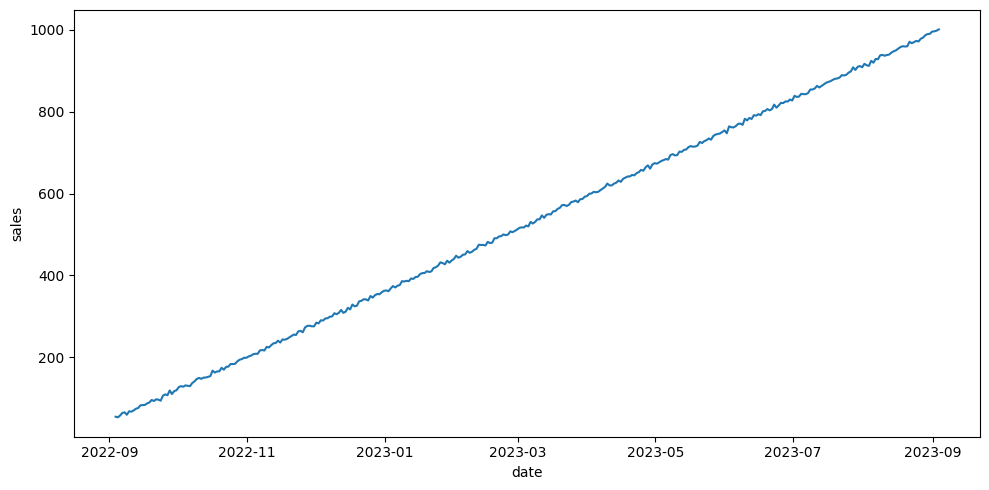

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)

plt.tight_layout()

plt.show()

#Notamos en las ventas un ingremento en el tiempo, siendo una tendencia ascendente
# Los datos tienen un tensor de cada dos meses 
# No se logra visualizar estacionariedad 
# Notamos una variabilidad muy pequeña



In [25]:
#Utilizamos la función seasonal_decompose de la biblioteca statsmodels para descomponer la serie de tiempo en sus componentes de tendencia, estacionalidad y residuos
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_total, period = 12)
decomposition

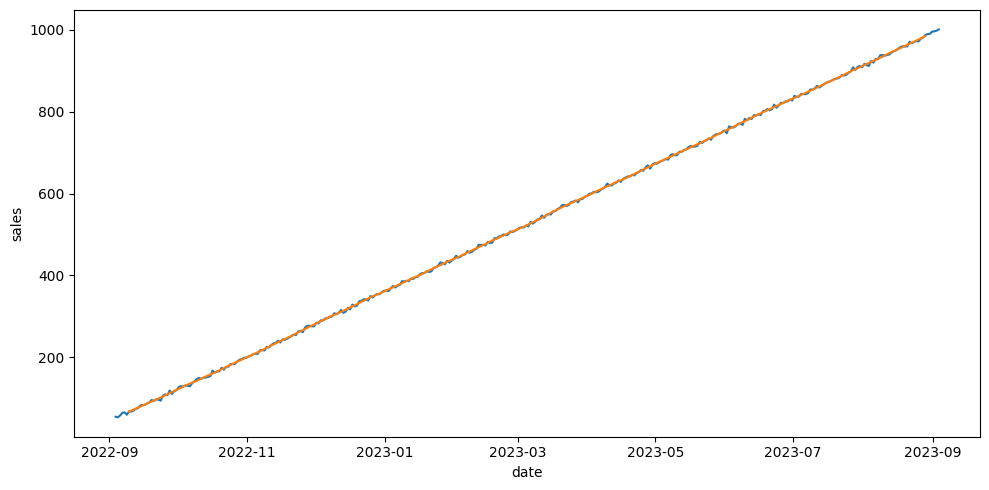

In [26]:
# Analisis de tendencia 
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

#Notamos en las ventas un ingremento en el tiempo, siendo una tendencia ascendente


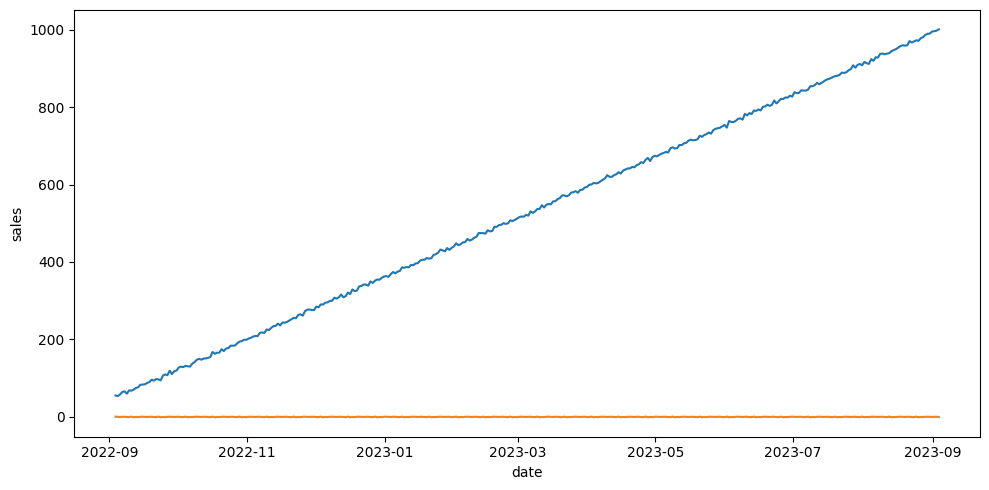

In [27]:
#Análisis de la estacionalidad

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

# No se visualiza estacionalidad 

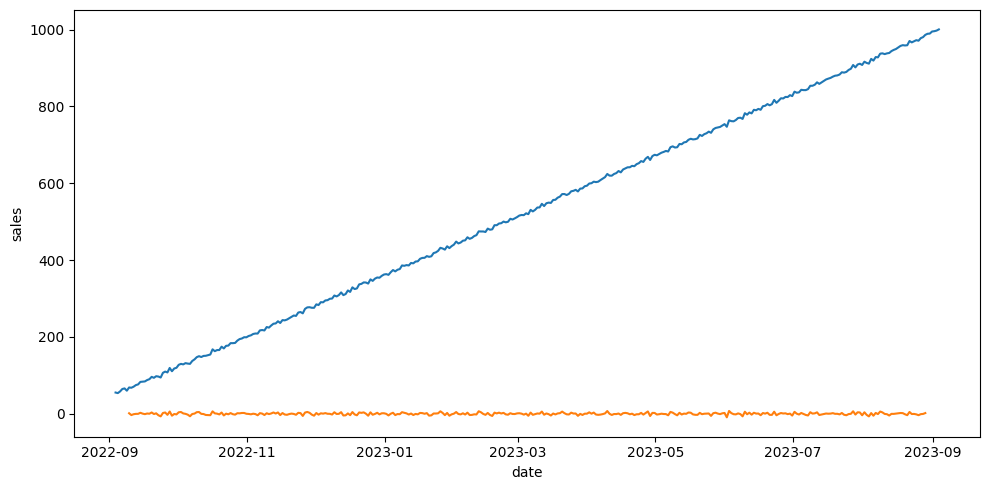

In [28]:
#Análisis de la variabilidad
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

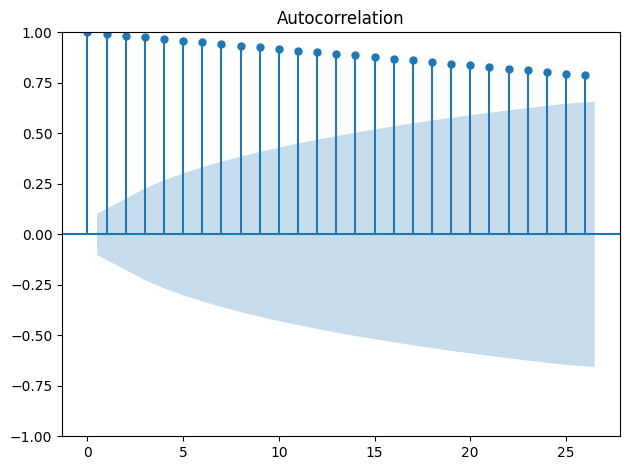

In [29]:
#Análisis de la autocorrelación
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_total)

plt.tight_layout()

plt.show()

#Se aprecia una alta correlación entre los puntos y sus copias retrasadas, que disminuye a lo largo del tiempo.

Modelo ARIMMA

In [23]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_total)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [30]:
#Calcula la diferencia entre cada valor y el valor anterior en la serie temporal ts.
#Este proceso de "diferenciar" una serie es una técnica común para hacerla estacionaria, eliminando tendencias y patrones de crecimiento o decrecimiento a largo plazo.

ts_stationary = ts_total.diff().dropna()

test_stationarity(ts_stationary)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [34]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = False, trace = True, m = 12)

# nos devuelve los mejores parametros ARIMA(1,0,1)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1854.775, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2205.881, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2208.143, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1862.229, Time=0.81 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1843.049, Time=0.82 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1843.587, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1841.533, Time=0.43 sec
 A

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Sun, 27 Oct 2024   AIC                           1839.552
Time:                        21:45:08   BIC                           1855.152
Sample:                             0   HQIC                          1845.752
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.8133      0.142    -19.808      0.000      -3.092      -2.535
ar.L1         -0.0830      0.055     -1.504      0.132      -0.191       0.025
ma.L1         -0.9413      0.022    -43.218      0.000      -0.984      -0.899
sigma2         8.7925      0.695     12.649      0.000       7.430      10.155
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.96   Prob(JB):                         0.64
Heteroskedasticity (H):               1.11   Skew:                             0.08
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
#prdicciones 
forecast = model.predict(60)
forecast

2023-09-04 17:10:08.079328    1.675366
2023-09-05 17:10:08.079328    2.673520
2023-09-06 17:10:08.079328    2.591621
2023-09-07 17:10:08.079328    2.598341
2023-09-08 17:10:08.079328    2.597789
2023-09-09 17:10:08.079328    2.597834
2023-09-10 17:10:08.079328    2.597831
2023-09-11 17:10:08.079328    2.597831
2023-09-12 17:10:08.079328    2.597831
2023-09-13 17:10:08.079328    2.597831
2023-09-14 17:10:08.079328    2.597831
2023-09-15 17:10:08.079328    2.597831
2023-09-16 17:10:08.079328    2.597831
2023-09-17 17:10:08.079328    2.597831
2023-09-18 17:10:08.079328    2.597831
2023-09-19 17:10:08.079328    2.597831
2023-09-20 17:10:08.079328    2.597831
2023-09-21 17:10:08.079328    2.597831
2023-09-22 17:10:08.079328    2.597831
2023-09-23 17:10:08.079328    2.597831
2023-09-24 17:10:08.079328    2.597831
2023-09-25 17:10:08.079328    2.597831
2023-09-26 17:10:08.079328    2.597831
2023-09-27 17:10:08.079328    2.597831
2023-09-28 17:10:08.079328    2.597831
2023-09-29 17:10:08.07932

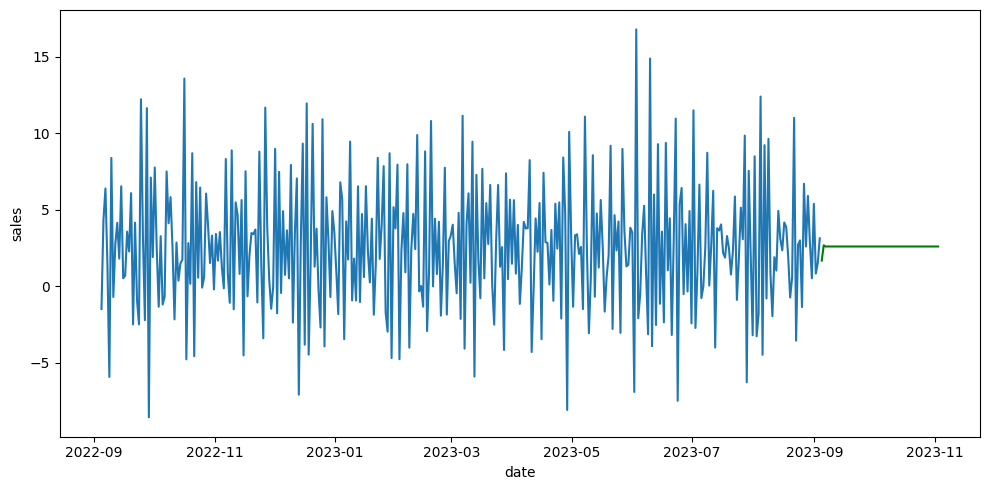

In [37]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()